In [1]:
from __future__ import division, print_function

In [2]:
!pwd

/srv/scratch/avanti/av_scripts/adhoc/exploreloss


In [9]:
import gzip
import numpy as np
import sys

path = "/srv/scratch/avanti/encode_download/Gm12878/Ctcf/ENCSR859FDL/chr1only_pvalues_ENCFF713IYR.bedGraph.gz"
f = gzip.open(path, "rb")
data = []
for (i,line) in enumerate(f):
    if (i%1000000 == 0):
        print("Done",i)
        sys.stdout.flush()
    line = line.rstrip()
    chrom, start, end, val = line.split("\t")
    start = int(start)
    end = int(end)
    val = float(val)
    data.append((chrom,start,end,val))

Done 0
Done 1000000
Done 2000000
Done 3000000
Done 4000000
Done 5000000
Done 6000000
Done 7000000
Done 8000000
Done 9000000
Done 10000000
Done 11000000
Done 12000000
Done 13000000
Done 14000000
Done 15000000
Done 16000000
Done 17000000
Done 18000000
Done 19000000
Done 20000000
Done 21000000
Done 22000000
Done 23000000


In [10]:
f.close()

In [12]:
from collections import OrderedDict
import sys

stride = 50
window_size = 200

chromosome_to_records = {}

for i,(chrom,start,end,val) in enumerate(data):
    if (i%1000000 == 0):
        print("Done",i,"on chrom",chrom)
        sys.stdout.flush()
    if chrom not in chromosome_to_records:
        chromosome_to_records[chrom] = {}
    records = chromosome_to_records[chrom]
    
    first_window_end = int(np.ceil((start+1)/float(stride))*stride)
    last_window_start = int(int((end-1)/float(stride))*stride)
    
    window_start = first_window_end - window_size
    while (window_start <= last_window_start):
        entry = str(window_start)+"-"+str(window_start+window_size)
        if entry not in records:
            records[entry] = val
        else:
            records[entry] = max(val, records[entry])
        window_start += stride


Done 0 on chrom chr1
Done 1000000 on chrom chr1
Done 2000000 on chrom chr1
Done 3000000 on chrom chr1
Done 4000000 on chrom chr1
Done 5000000 on chrom chr1
Done 6000000 on chrom chr1
Done 7000000 on chrom chr1
Done 8000000 on chrom chr1
Done 9000000 on chrom chr1
Done 10000000 on chrom chr1
Done 11000000 on chrom chr1
Done 12000000 on chrom chr1
Done 13000000 on chrom chr1
Done 14000000 on chrom chr1
Done 15000000 on chrom chr1
Done 16000000 on chrom chr1
Done 17000000 on chrom chr1
Done 18000000 on chrom chr1
Done 19000000 on chrom chr1
Done 20000000 on chrom chr1
Done 21000000 on chrom chr1
Done 22000000 on chrom chr1
Done 23000000 on chrom chr1


In [16]:
all_vals = np.array(list(chromosome_to_records['chr1'].values()))

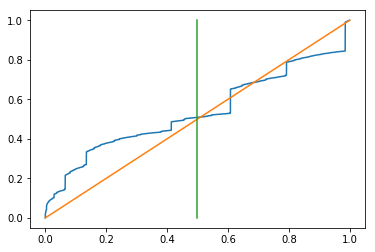

In [57]:
exponentiated = np.exp(-all_vals*np.log(10))
sorted_exp = np.array(sorted(exponentiated))
plt.plot(sorted_exp, np.arange(len(sorted_exp))/len(sorted_exp))
plt.plot([0,1],[0,1])
plt.plot([0.5,0.5],[0,1])
plt.show()

In [38]:
from collections import Counter
val_counts = Counter(all_vals)

In [45]:
sorted_valcounts = sorted(val_counts.items(), key=lambda x: -x[1])

In [47]:
sorted_valcounts[:1000]

[(0.00644, 725691),
 (0.21596, 599841),
 (1.18516, 343861),
 (0.1011, 323666),
 (0.87039, 316064),
 (0.38304, 212924),
 (2.37589, 106470),
 (1.54302, 82924),
 (1.09125, 28166),
 (0.90124, 26852),
 (0.18976, 26365),
 (0.79514, 26005),
 (0.64444, 23734),
 (2.8455, 23603),
 (0.14019, 21822),
 (0.52167, 19643),
 (0.74406, 18493),
 (0.34214, 17056),
 (0.10314, 16154),
 (0.26278, 15211),
 (0.42138, 14530),
 (0.61349, 13833),
 (1.9078, 11996),
 (1.63943, 11708),
 (2.22303, 11363),
 (3.87956, 10904),
 (4.44013, 10322),
 (0.08695, 10210),
 (0.33934, 10108),
 (0.50476, 9859),
 (1.19906, 9666),
 (1.40947, 9539),
 (1.42985, 9482),
 (0.20117, 9243),
 (0.21532, 9167),
 (0.20489, 8800),
 (0.18556, 8797),
 (0.0755, 8652),
 (0.19495, 8030),
 (1.21149, 7924),
 (0.06109, 7886),
 (0.17653, 7722),
 (1.07582, 7490),
 (1.18292, 7418),
 (0.16792, 7209),
 (1.04228, 7011),
 (1.14595, 6943),
 (0.41414, 6891),
 (1.0098, 6822),
 (0.15979, 6624),
 (0.27227, 6588),
 (1.11017, 6352),
 (0.9786, 6202),
 (0.15336, 6170)

In [55]:
filtered_vals = np.array([x for x in all_vals if val_counts[x] < 80000])

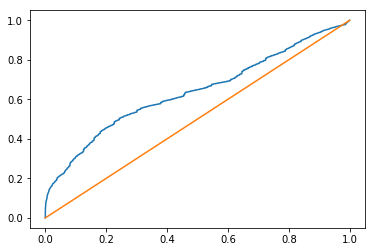

In [56]:
exponentiated = np.exp(-filtered_vals*np.log(10))
sorted_exp = np.array(sorted(exponentiated))
plt.plot(sorted_exp, np.arange(len(sorted_exp))/len(sorted_exp))
plt.plot([0,1],[0,1])
plt.show()

4978917